# Estimação

A estimação é o processo de usar dados de uma amostra para inferir os parâmetros desconhecidos de uma população. Existem dois tipos principais:

- Ponto: Um único valor que estima o parâmetro (ex.: média)
- Intervalar: Um intervalo que captura o parâmetro com uma certa confiança (ex.: intervalo de confiança)

In [18]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from scipy.stats import t

In [3]:
dados = [10, 12, 15, 14, 18, 20]

# estimativas
media_estimada = np.mean(dados)
variancia_estimada = np.var(dados, ddof=1) # ddof=1 usa a variância amostral

In [4]:
print(f"Média estimada: {media_estimada}")
print(f"Variância estimada: {variancia_estimada}")

Média estimada: 14.833333333333334
Variância estimada: 13.766666666666666


## Propriedades de Estimadores

Um bom estimador deve ter as seguintes propriedades:

- Não viciado: O valor esperado do estimador é igual ao parâmetro real
  
- Consistência: O estimador converge para o valor verdadeiro à medida que o tamanho da amostra aumenta
  
- Eficiência: O estimador tem menor variância entre os estimadores não viciados

In [7]:
populacao = np.random.normal(50, 10, 10000) # média 50 e desvio 10
tamanhos_amostras = [5, 10, 30, 100]

medias = []

for tamanho in tamanhos_amostras:
    medias_amostras = [np.mean(np.random.choice(populacao, tamanho)) for _ in range(1000)]
    medias.append(medias_amostras)

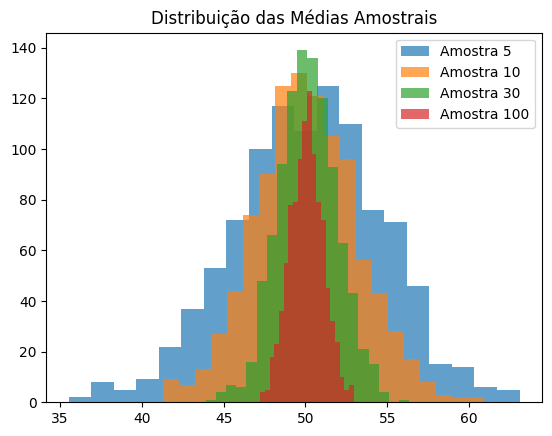

In [8]:
for i, tamanho in enumerate(tamanhos_amostras):
    plt.hist(medias[i], bins=20, alpha=0.7, label=f"Amostra {tamanho}")

plt.legend()
plt.title("Distribuição das Médias Amostrais")
plt.show()

## Estimadores de Momentos

Usam os momentos da amostra (ex.: média, variância) para estimar os momentos populacionais

In [9]:
dados = [2, 4, 6, 8, 10]

# momento de ordem 1 (média)
momento_1 = np.mean(dados)

# momento de ordem 2 (variância não central)
momento_2 = np.mean([x**2 for x in dados])

print(f"Momento 1: {momento_1}")
print(f"Momento 2: {momento_2}")

Momento 1: 6.0
Momento 2: 44.0


## Estimadores de Mínimos Quadrados

Minimizam o erro quadrático entre os valores observados e os previstos

In [14]:
x = np.array([1, 2, 3, 4, 5]).reshape(-1, 1)
y = np.array([2.2, 2.8, 3.6, 4.5, 5.1])

# modelo de mínimos quadrados
modelo = LinearRegression()
modelo.fit(x, y)

# previsão
y_pred = modelo.predict(x)

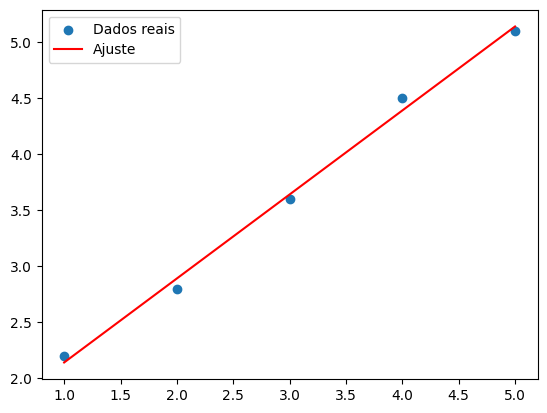

In [15]:
plt.scatter(x, y, label="Dados reais")
plt.plot(x, y_pred, color='red', label="Ajuste")
plt.legend()
plt.show()

## Intervalos de Confiança

Um intervalo de confiança é um intervalo estimado que provavelmente contém o verdadeiro valor de um parâmetro populacional. Por exemplo, se temos um intervalo de confiança de 95% para a média de 10 a 20, significa que, em 95% das amostras a verdadeira média estará nesse intervalo

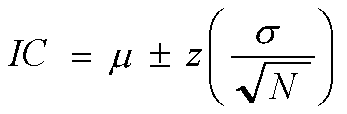
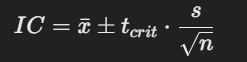

In [19]:
dados = [12, 15, 14, 13, 16, 17, 14]

n = len(dados)  # tamanho da amostra
media = np.mean(dados)  # média amostral
desvio_padrao = np.std(dados, ddof=1)  # desvio padrão amostral
erro_padrao = desvio_padrao / np.sqrt(n)  # erro padrão

In [20]:
# valor crítico para 95% de confiança (distribuição t de Student)
t_critico = t.ppf(0.975, df=n-1)  # df = graus de liberdade (n-1)

In [21]:
margem_erro = t_critico * erro_padrao

# limites do intervalo de confiança
limite_inferior = media - margem_erro
limite_superior = media + margem_erro

print(f"Intervalo de confiança de 95%: ({limite_inferior:.2f}, {limite_superior:.2f})")

Intervalo de confiança de 95%: (12.84, 16.02)
